# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Graph plots in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Setup

In [20]:
import os
from lightning import Lightning

from numpy import random, asarray, argmin
from colorsys import hsv_to_rgb
import networkx as nx

## Conectandose al servidor


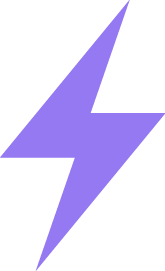

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

In [21]:
lgn = Lightning(ipython=True)

## <hr> Gráficas espaciales aleatorias

Tienen nodos con posiciones espaciales fijas , y los vínculos entre ellos.
<br>
Son útiles para la red de datos espaciales , donde la posición tiene un significado especifico.
<br>
En primer lugar vamos a generar un gráfico geométrico al azar usando ` networkx` con un estilo básico.
<br>
El gráfico geométrico coloca al azar enlaces entre nodos con probabilidades que dependen de la distancia espacial.

In [22]:
G = nx.random_geometric_graph(100, 0.2)
pos = asarray(nx.get_node_attributes(G, 'pos').values())
mat = nx.adjacency_matrix(G).todense()

In [23]:
lgn.graph(pos[:,0], pos[:,1], mat)

Podemos añadir un color a cada nodo. Aquí coloreamos el mismo gráfico basados en la distancia desde el origen

In [24]:
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in pos]
lgn.graph(pos[:,0], pos[:,1], mat, values=dists, colormap='Greens')

También podemos colorear grupos mediante etiquetas.
<br>
Aquí asignamos una etiqueta a cada punto sobre la base de la ruta más corta desde  el centro .

In [25]:
center = argmin(dists)
p = nx.single_source_shortest_path_length(G, center)
xy = asarray([pos[i,:] for i in p.keys()])
g = p.values()
lgn.graph(xy[:,0], xy[:,1], mat, group=g)

## <hr>Agrupación Edge 

Gráficos con muchas aristas pueden llegar a ser difícil de visualizar.
<br>
Lightning ayuda con esto a permitir que al hacer clic en los puntos, solo sean visibles los enlaces a ese nodo.

In [26]:
G = nx.random_geometric_graph(50, 0.5)
pos = asarray(nx.get_node_attributes(G, 'pos').values())
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in pos]
mat = nx.adjacency_matrix(G).todense()

In [27]:
lgn.graph(pos[:,0], pos[:,1], mat)

## Ejemplo Graph con datos extraidos de una base de datos

In [70]:
import psycopg2, psycopg2.extras
try:
    conn = psycopg2.connect("dbname='gp' user='roma' host='localhost' password='roma'")
except:
    print "I am unable to connect to the database"
cur = conn.cursor()

In [74]:
cur.execute("""SELECT subtipos.idsubtipo,empresas.idempresa,nomempresa,nomsubtipo from produccion inner join empresas on produccion.idempresa=empresas.idempresa inner join subtipos on produccion.idsubtipo=subtipos.idsubtipo where anio=2004""")
rows = cur.fetchall()
i=1
a=0
x=[]
y=[]
for row in rows:
    i=i+1
    x.append(a)
    y.append([int(row[0]),int(row[1])])
    if i == 35:
        a=a+1
        i=0

## Relacion entre todas las empresas y todos los tipos de Generadores de Energia(Hidraulica,Biomasa ,Solar , Eolica...) 

Esta grafica representa la relacion entre todas las empresas y todos los tipos de energia , la grafica nos ayuda a la representacion de una cantidad elevada de uniones , y nos ayuda a hacer visible los nodos que se unen entre si al momento de hacer click en un nodo.

In [80]:

lgn.graph(pos[:,0], pos[:,1],y,group=x)